# Working with gravitational-wave detector data

We have seen what gravitational waves (GWs) are and how they may be detected, and also what data are publicly available ('open') for you to access.
But what can you do with the data? And how?

[GWpy](https://gwpy.github.io) is a general-purpose Python package for accessing and studying data from gravitational-wave detectors.
The project was created in Cardiff, but is now a key component in the majority of Python-based GW data analysis software workflows.

In this tutorial, we will see how to download open data from [GWOSC](https://gw-openscience.org) and manipulate them to study the properties of events that emitted gravitational waves.

First, we need to install it, using [`pip`](https://pip.pypa.io/) as we did before:

In [1]:
# this is just a fancy version of 'pip install gwpy' for use inside a jupyter notebook
import sys
!{sys.executable} -m pip install --quiet gwpy

If you are using Google Colab, you may have to **restart the kernel runtime** at this point to see the newly installed packages.

Once GWpy is installed you should be able to `import` it and get the basic information easily:

In [1]:
import gwpy
help(gwpy)

Help on package gwpy:

NAME
    gwpy - A python package for gravitational-wave astrophysics

DESCRIPTION
    GWpy is a collaboration-driven `Python <http://www.python.org>`_ package
    providing tools for studying data from ground-based gravitational-wave
    detectors.
    
    GWpy provides a user-friendly, intuitive interface to the common time-domain
    and frequency-domain data produced by the `LIGO <http://www.ligo.org>`_ and
    `Virgo <http://www.ego-gw.it>`_ instruments and their analysis,
    with easy-to-follow tutorials at each step.

PACKAGE CONTENTS
    _version
    astro (package)
    cli (package)
    conftest
    detector (package)
    frequencyseries (package)
    io (package)
    plot (package)
    segments (package)
    signal (package)
    spectrogram (package)
    table (package)
    testing (package)
    time (package)
    timeseries (package)
    types (package)
    utils (package)

VERSION
    2.0.4

AUTHOR
    Duncan Macleod <duncan.macleod@ligo.org>

CREDIT

## How can I use GWpy to actually get to the data?

We have seen how the [`gwosc`](https://gwosc.readthedocs.io/) Python package can be used to discover what datasets are available.
GWpy builds on this by providing methods to download the actual data with a minimum of information required.

### Downloading tables of event parameters

The first thing we can do is to download tables of the events that have been discovered.
We do this using the [`gwpy.table.EventTable`](https://gwpy.github.io/docs/stable/table/) object, and the special [`fetch_open_data`](https://gwpy.github.io/docs/stable/table/gwosc.html) method it comes with:

In [2]:
from gwpy.table import EventTable
events = EventTable.fetch_open_data("GWTC")
display(events)

name,mass_1_source_lower,GPS,total_mass_source,redshift_upper,chirp_mass_source,mass_2_source_upper,jsonurl,chi_eff_upper,mass_1_source,final_mass_source,catalog.shortName,far,mass_2_source,final_mass_source_lower,chirp_mass_source_lower,chirp_mass,chirp_mass_upper,far_lower,final_mass_source_upper,chi_eff,far_upper,luminosity_distance,total_mass_source_upper,chirp_mass_lower,mass_2_source_lower,redshift_lower,luminosity_distance_upper,redshift,luminosity_distance_lower,chirp_mass_source_upper,network_matched_filter_snr_upper,commonName,mass_1_source_upper,network_matched_filter_snr_lower,total_mass_source_lower,reference,version,network_matched_filter_snr,chi_eff_lower
,,,solMass,,solMass,,,,solMass,solMass,,1 / yr,solMass,,,solMass,,,,,,Mpc,,,,,,,,,,,,,,,,,
str18,float64,float64,object,float64,float64,float64,str73,float64,float64,object,str16,float64,float64,object,float64,object,object,object,object,float64,object,float64,object,object,float64,float64,float64,float64,float64,float64,object,str15,float64,object,object,str33,int32,float64,float64
GW150914-v3,-3.1,1126259462.4,None,0.03,28.6,3.0,https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3,0.12,35.6,63.1,GWTC-1-confident,1e-07,30.6,-3.0,-1.5,None,None,None,3.4,-0.01,None,440.0,None,None,-4.4,-0.03,150.0,0.09,-170.0,1.7,None,GW150914,4.7,None,None,https://doi.org/10.7935/82H3-HH23,3,24.4,-0.13
GW151012-v3,-5.5,1128678900.4,None,0.09,15.2,4.1,https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW151012/v3,0.31,23.2,35.6,GWTC-1-confident,0.00792,13.6,-3.8,-1.2,None,None,None,10.8,0.05,None,1080.0,None,None,-4.8,-0.09,550.0,0.21,-490.0,2.1,None,GW151012,14.9,None,None,https://doi.org/10.7935/82H3-HH23,3,10.0,-0.2
GW151226-v2,-3.2,1135136350.6,None,0.04,8.9,2.2,https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW151226/v2,0.2,13.7,20.5,GWTC-1-confident,1e-07,7.7,-1.5,-0.3,None,None,None,6.4,0.18,None,450.0,None,None,-2.5,-0.04,180.0,0.09,-190.0,0.3,None,GW151226,8.8,None,None,https://doi.org/10.7935/82H3-HH23,2,13.1,-0.12
GW170104-v2,-5.6,1167559936.6,None,0.08,21.4,4.9,https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170104/v2,0.17,30.8,48.9,GWTC-1-confident,1e-07,20.0,-4.0,-1.8,None,None,None,5.1,-0.04,None,990.0,None,None,-4.6,-0.08,440.0,0.2,-430.0,2.2,None,GW170104,7.3,None,None,https://doi.org/10.7935/82H3-HH23,2,13.0,-0.21
GW170608-v3,-1.7,1180922494.5,None,0.02,7.9,1.4,https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170608/v3,0.19,11.0,17.8,GWTC-1-confident,1e-07,7.6,-0.7,-0.2,None,None,None,3.4,0.03,None,320.0,None,None,-2.2,-0.02,120.0,0.07,-110.0,0.2,None,GW170608,5.5,None,None,https://doi.org/10.7935/82H3-HH23,3,14.9,-0.07
GW170729-v1,-10.2,1185389807.3,None,0.19,35.4,9.1,https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170729/v1,0.21,50.2,79.5,GWTC-1-confident,0.02,34.0,-10.2,-4.8,None,None,None,14.7,0.37,None,2840.0,None,None,-10.1,-0.21,1400.0,0.49,-1360.0,6.5,None,GW170729,16.2,None,None,https://doi.org/10.7935/82H3-HH23,1,10.2,-0.25
GW170809-v1,-5.9,1186302519.8,None,0.05,24.9,5.1,https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170809/v1,0.17,35.0,56.3,GWTC-1-confident,1e-07,23.8,-3.8,-1.7,None,None,None,5.2,0.08,None,1030.0,None,None,-5.2,-0.07,320.0,0.2,-390.0,2.1,None,GW170809,8.3,None,None,https://doi.org/10.7935/82H3-HH23,1,12.4,-0.17
GW170814-v3,-3.0,1186741861.5,None,0.03,24.1,2.8,https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW170814/v3,0.12,30.6,53.2,GWTC-1-confident,1e-07,25.2,-2.4,-1.1,None,None,None,3.2,0.07,None,600.0,None,None,-4.0,-0.04,150.0,0.12,-220.0,1.4,None,GW170814,5.6,None,None,https://doi.org/10.7935/82H3-HH23,3,15.9,-0.12


Here we have 50 events from combined [Gravitational Wave Transient Catalogue (GWTC)](https://www.gw-openscience.org/eventapi/html/GWTC/).

A big table isn't very easy to use, but we can use our `events` object and make a few plots to see what we can infer:

In [3]:
# we do this now, and only once, so that the plots show up inline in the notebook,
# you don't need to do this outside of jupyter
%matplotlib inline

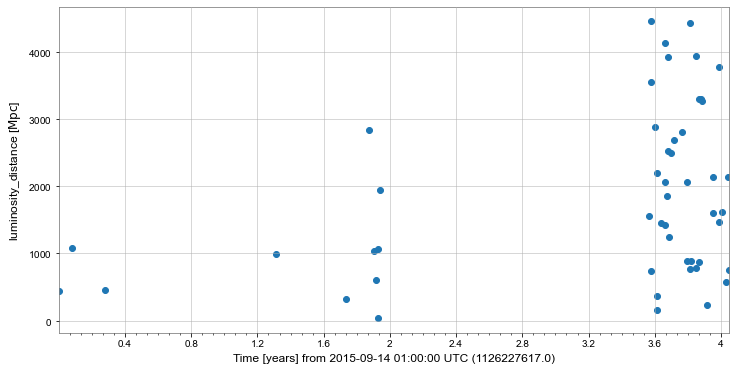

In [4]:
mass_vs_time_plot = events.scatter("GPS", "luminosity_distance", xscale="auto-gps")

Here we can see the first few events on the left from the first Observing run ([O1](https://www.gw-openscience.org/O1/), September 2015 -- January 2016), then a few more from [O2](https://www.gw-openscience.org/O2/) (November 2016 -- August 2017), then even more from [O3](https://www.gw-openscience.org/O3) (April 2019 -- March 2020).

We can also see the impact of the increasing sensitivity of the detector network from one run to the next run, with many detections coming from larger distances that we weren't senstitive to before.

Let's try something else:

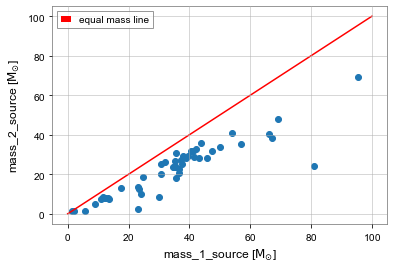

In [5]:
# plot mass1 vs mass2
m1m2_plot = events.scatter("mass_1_source", "mass_2_source")
# add a line representing 'equal mass' (mass1=mass2)
axes = m1m2_plot.gca()  # gca == "get current axes"
axes.plot([0, 100], [0, 100], "r-", label="equal mass line")
axes.legend()

Here we see the distribution of masses in our detection sample.
By convention `mass_1` is always the heavier of the two masses, and the `_source` suffix means that these numbers represent the 'real' mass of the object in the source frame, i.e. after accounting for signal distortions due to redshift.

We can see that most of the signals are near equal mass (`mass_1_source = mass_2_source`), but a few have a large _mass ratio_ where the large body is significantly larger than the smaller one.

<div class="alert alert-info">This catalogue does not (yet) include the very latest results announced last month, including detections of so-called 'mixed' merged (one black hole merging with one neutron star).</div>

Finally we can visualise the distribution of total mass (`mass1 + mass2`) as a function of distance:

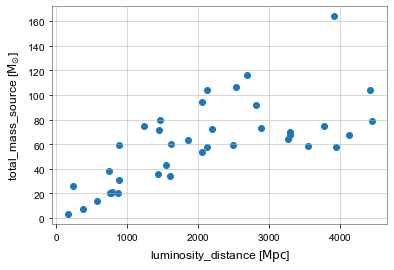

In [6]:
mass_vs_distance = events.scatter("luminosity_distance", "total_mass_source")

Here we can see a general trend towards heavier merger events being detected from further away.
This is in general because the current GW detectors are more sensitive to higher-mass events, and so can detect them from further distances - and further distances represents a significantly large volume of space so more events happen at larger distances (per unit volume, per unit time).

### Downloading detector data for an event

Now that we have seen the distribution of events, and how the various parameters may (or may not) be correlated, we can investigate the detector data for a single event.

To support this, GWpy provides a [`TimeSeries`](https://gwpy.github.io/docs/stable/timeseries/) object to represent a time-stream of detector data, which comes with a `fetch_open_data` method we can call to download data directly from GWOSC.

For this example we will use times corresponding to the first ever detection, GW150914.

In [7]:
from gwosc.datasets import event_gps
gps = event_gps("GW150914")
print("Central GPS time: {}".format(gps))
start, stop = int(gps)-5, int(gps) + 5
print("Data start: {}".format(start))
print("Data stop: {}".format(stop))

Central GPS time: 1126259462.4
Data start: 1126259457
Data stop: 1126259467


In [8]:
# import the Gwpy TimeSeries object
from gwpy.timeseries import TimeSeries
# and call the fetch_open_data method to download data for LIGO-Hanford
# notes:
#   - we use the `verbose=True` argument to show what's going on
data = TimeSeries.fetch_open_data('H1', start, stop, verbose=True)
print(data)

Fetched 1 URLs from www.gw-openscience.org for [1126259457 .. 1126259467))
Reading data... [Done]
TimeSeries([-3.37408113e-19, -3.60538427e-19, -3.22327735e-19,
            ...,  1.52206625e-19,  1.58897479e-19,
             1.71197631e-19]
           unit: dimensionless,
           t0: 1126259457.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


We can see that we have a `TimeSeries` object, containing an array of data, and some other metadata parameters.

<div class="alert alert-info">
    The data we have downloaded are not stored permanently anywhere on your machine, so if you run the same command again, the data will be downloaded again. You can prevent this by specifying <code>cache=True</code> when calling <code>TimeSeries.fetch_open_data</code> to store a copy of the data on your machine.
For technical reasons, the data will be stored under <code>~/.astropy/cache</code>.
</div>

We can now make a plot of the data simply by calling [`data.plot()`](https://gwpy.github.io/docs/stable/timeseries/plot.html):

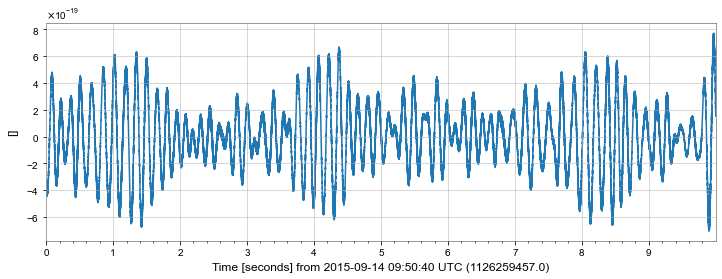

In [9]:
plot = data.plot()

We see a 10-second span of wiggles. By eye we can see roughly 8 or 10 oscillations per second, suggesting that the data are dominated by very low frequency (<1 Hz) contributions.
As we heard in the introduction notebook, gravitational waves from binary black holes typically merge at tens or hundreds of Hertz, and neutron stars at even higher frequencies, so this noise is almost certainly not from gravitational waves.

### Studying GW detector data in the frequency domain

Because of this noise, direct analysis of GW detector data in the time domain like this is often not very helpful.
Typically we use the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) to expose the frequency-domain content of our time-domain signal, allowing us to see which frequencies contain lots of power, and which have less.

We can calculate our Fourier transform using the [`.fft()`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.fft) method, which uses the underlying [`numpy.fft`](https://numpy.org/doc/stable/reference/routines.fft.html) implementation of the [Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) algorithm:

In [10]:
fft = data.fft()
print(fft)

FrequencySeries([ 2.83592039e-21+0.00000000e+00j,
                 -1.72531983e-20+9.11145513e-21j,
                  1.55498401e-20-6.38067019e-21j, ...,
                 -1.14703105e-23-7.91379036e-26j,
                 -1.15218693e-23+8.39374010e-28j,
                 -1.15216273e-23+0.00000000e+00j]
                unit: dimensionless,
                f0: 0.0 Hz,
                df: 0.1 Hz,
                epoch: 1126259457.0,
                name: Strain,
                channel: None)


The result is a [`FrequencySeries`](https://gwpy.github.io/docs/stable/frequencyseries/), with complex amplitude, representing the amplitude and phase of each frequency in our data. We can use `.abs()` to extract the amplitude and plot that:

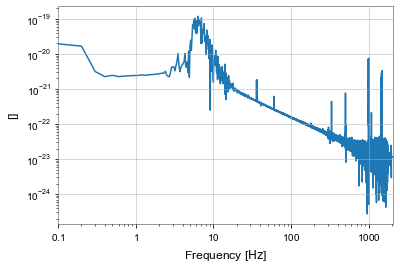

In [11]:
plot = fft.abs().plot(xscale="log", yscale="log")

This doesn't look correct at all!
The problem is that the FFT works under the assumption that our data are periodic, which means that the edges of our data look like discontinuities when transformed.
We need to apply a window function to our time-domain data before transforming, which we can do using the scipy.signal module:

In [12]:
from scipy.signal import get_window
window = get_window('hann', data.size)
windowed = data * window

Let's try our transform again and see what we get

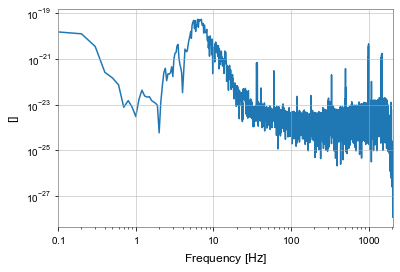

In [13]:
fftamp = windowed.fft().abs()
plot = fftamp.plot(xscale="log", yscale="log")

This looks a little more like what we expect for the amplitude spectral density of a gravitational-wave detector.

In practice, we typically use a large number of FFTs to estimate an average power spectral density over a long period of data. We can do this using the [`.asd()`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.asd) method, which uses [Welch's method](https://en.wikipedia.org/wiki/Welch%27s_method) to combine FFTs of overlapping, windowed chunks of data.
The `method="median"` argument tells the `.asd()` method to use a median average of overlapping chunks, as opposed to a mean average, which is easily corrupted by large outliers.

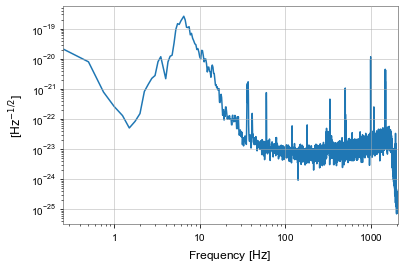

In [14]:
asd = data.asd(fftlength=4, method="median")
plot = asd.plot()

The ASD is a standard tool used to study the frequency-domain sensitivity of a gravitational-wave detector. For the LIGO-Hanford data we loaded, we can see large spikes at certain frequencies, including

- ~300 Hz
- ~500 Hz
- ~1000 Hz

The [O2 spectral lines](https://www.gw-openscience.org/o2speclines/) page from GWOSC describes a number of these spectral features for O2, with some of them being forced upon us, and some being deliberately introduced to help with interferometer control.

We can improve the resolution of our ASD by using more data, which averages out random variations.
In the next cell we do this for a different (more recent) event, [GW190814](https://www.gw-openscience.org/eventapi/html/GWTC-2/GW190814/), whilst also loading the data for all three detectors in the network:

Fetched 1 URLs from www.gw-openscience.org for [1249851745 .. 1249852769))
Reading data... [Done]
Fetched 1 URLs from www.gw-openscience.org for [1249851745 .. 1249852769))
Reading data... [Done]
Fetched 1 URLs from www.gw-openscience.org for [1249851745 .. 1249852769))
Reading data... [Done]


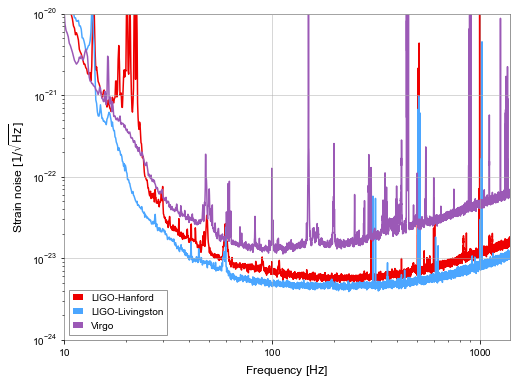

In [15]:
# get the GPS time for GW190814
gps = event_gps("GW190814")

# use a longer time segment
longstart, longend = int(gps) - 512, int(gps) + 512

# get data for each detector
data = {}
asd = {}
for detector in ("H1", "L1", "V1"):
    data[detector] = TimeSeries.fetch_open_data(
        detector,
        longstart,
        longend,
        verbose=True,
        cache=True,
    )
    asd[detector] = data[detector].asd(fftlength=8, method="median")

# now plot the Hanford data, then add the others
plot = asd["H1"].plot(figsize=(8, 6), color="gwpy:ligo-hanford", label="LIGO-Hanford")
axes = plot.gca()
axes.plot(asd["L1"], color="gwpy:ligo-livingston", label="LIGO-Livingston")
axes.plot(asd["V1"], color="gwpy:virgo", label="Virgo")

# now finalise the plot
axes.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
axes.set_xlim(10, 1400)
axes.set_ylim(1e-24, 1e-20)
axes.legend()

Here we can see the variations in sensitivity between the LIGO detectors and Virgo, and also the different features present in the data for each detector.

## Recap

In this tutorial we have seen

- how to use GWpy to download tables of event parameters, and display them in various formats
- how to use GWpy to download data for a detector around the time of an event and display them
- how to generate and display an ASD, understanding the importance of windowing and averaging on top of the basic Fourier transform

In the next tutorial we will dive a little deeper into how signals may be extracted from noisy data.

<a class="btn btn-primary" href="./3-SignalProcessing.ipynb" target="_blank" role="button">Click here</a> to open the next notebook.